# AutoFinViz Demo

In [ ]:
from autofinviz.components.pipeline import Pipeline
from autofinviz.utils import json_to_readable

import pandas as pd

## Classifier

In [2]:
pipline = Pipeline()

df = pd.read_csv("example/data/Stock_price_TSLA.csv")
df_name = "Stock_price_TSLA"

category = pipline.classify(df)
print(category)

Market Dataset


## Summarizer

In [3]:
summary, df = pipline.summarize(df, df_name, category)
print(json_to_readable(summary))

['Daily Return', 'Moving Average', 'Relative Strength Index']
df['Daily Return'] = df['Adj Close'].pct_change()
df['Moving Average'] = df['Adj Close'].rolling(window=20).mean()
#Calculate the Difference
delta = df['Adj Close'].diff(1)
delta = delta.dropna()
#Make the positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()
up[up < 0] = 0
down[down > 0] = 0
average_gain = up.rolling(window=14).mean()
average_loss = abs(down.rolling(window=14).mean())
#Calculate the Relative Strength (RS)
RS = average_gain / average_loss
#Calculate the Relative Strength Index (RSI)
df['Relative Strength Index'] = 100.0 - (100.0 / (1.0 + RS))
           Date        Open        High         Low       Close   Adj Close  \
0    2022-11-21  175.850006  176.770004  167.539993  167.869995  167.869995   
1    2022-11-22  168.630005  170.919998  166.190002  169.910004  169.910004   
2    2022-11-23  173.570007  183.619995  172.500000  183.199997  183.199997   
3    2022-11-25  185.0

## Question Formulator

In [4]:
questions_dict = pipline.formulate_questions(summary, 3)
print(json_to_readable(questions_dict))

  index: 0
  question: How does the opening price vary over time?
  visualization: lineplot of Date vs. Open
  rationale: By plotting the opening price against the date, we can observe the trend of the stock's opening price over time. This visualization will help us analyze any patterns or fluctuations in the opening price of the stock.

  index: 1
  question: What is the average daily return of the stock?
  visualization: bar chart of Daily Return
  rationale: By creating a bar chart of the daily return, we can determine the average daily return of the stock. This visualization will help us understand the overall performance of the stock and its potential for generating returns.

  index: 2
  question: How does the volume of the stock traded vary over time?
  visualization: lineplot of Date vs. Volume
  rationale: By plotting the volume of the stock traded against the date, we can analyze the trend of buying and selling activity for the stock over time. This visualization will help us

## Visualizer

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Additional imports can be added here if necessary
from matplotlib.ticker import FuncFormatter

def plot(df: pd.DataFrame):
    # The following section is for custom plotting logic.
    # Modify only within this area.
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y='Open')

    # Set the title of the plot. Modify title as needed.
    plt.title('Variation of Opening Price Over Time')

    # Format x-axis labels as date
    date_format = FuncFormatter(lambda x, _: pd.to_datetime(x).strftime('%Y-%m-%d'))
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=45)

    # Add a legend with the opening price range
    min_open = df['Open'].min()
    max_open = df['Open'].max()
    plt.axhline(min_open, color='r', linestyle='--', label=f'Min Opening Price: {min_open:.2f}')
    plt.axhline(max_open, color='g', linestyle='--', label=f'Max Opening Price: {max_open:.2f}')
    plt

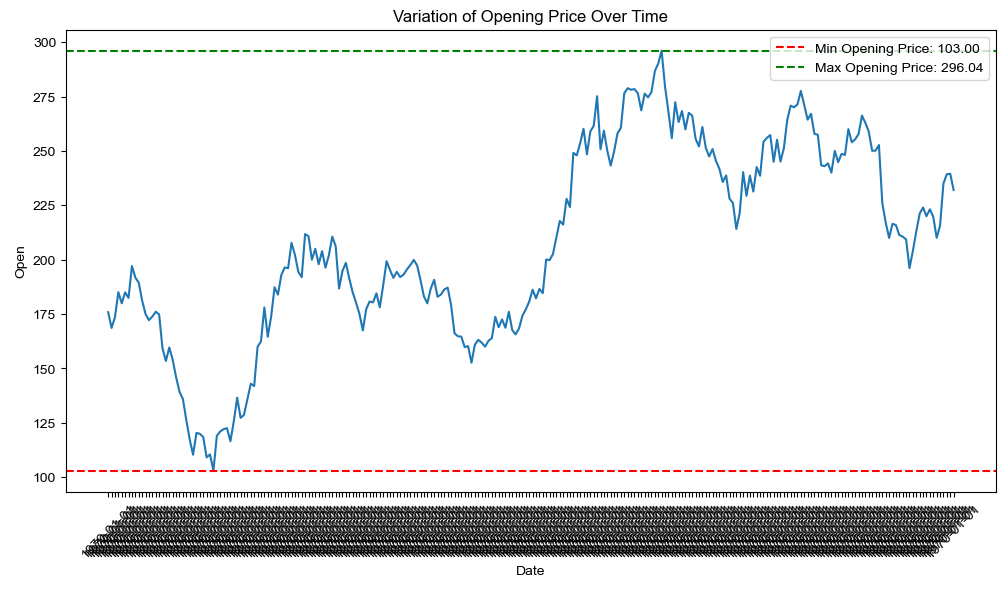

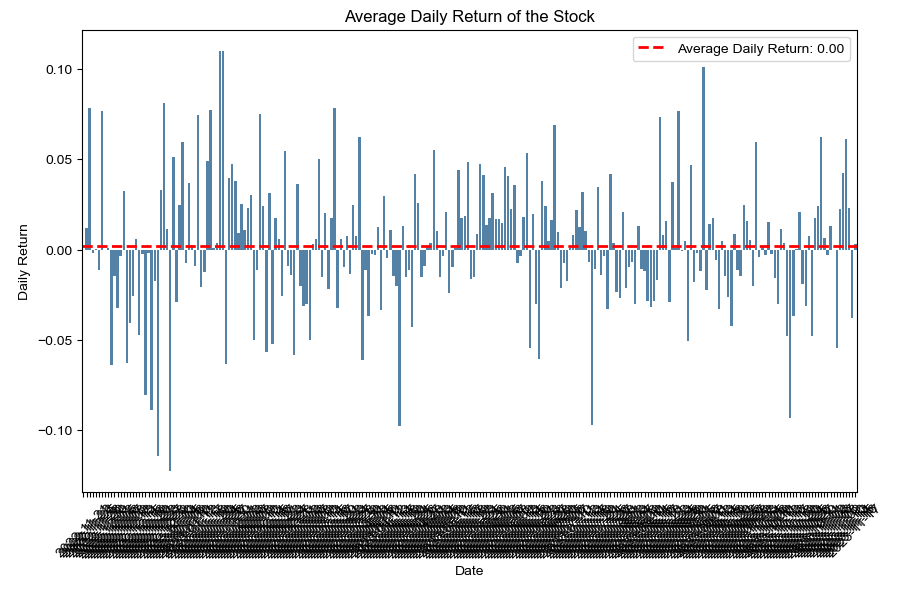

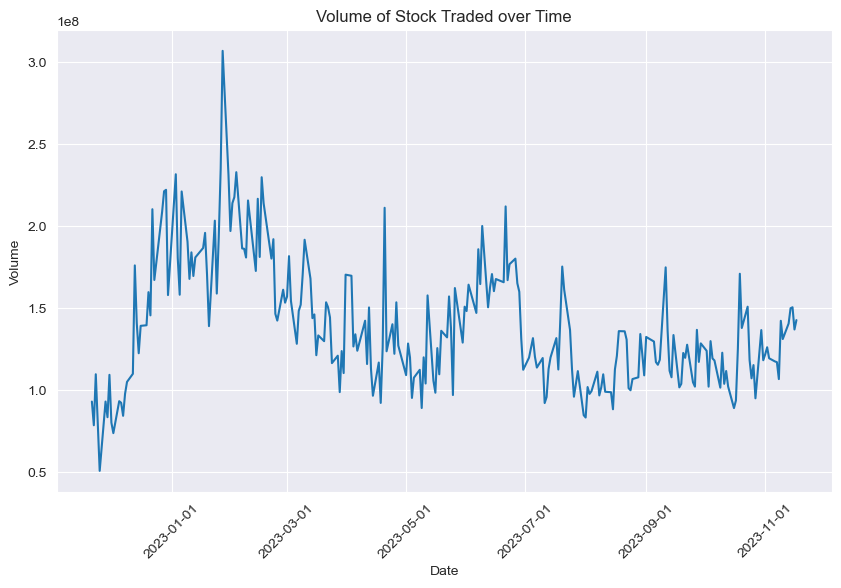

In [5]:
pipline.visualize(summary, questions_dict, df)